<a href="https://colab.research.google.com/github/nurmuhimawann/NLP-movie-genre-multiclass-text-classification/blob/main/Submission_NLP_TensorFlow_Multiclass_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Profile** <br>
*Nama: Nur Muhammad Himawan* <br>
*Domisili: Banyuwangi, Jawa Timur* <br>
*E-mail: muhammad.himawan73@gmail.com* <br>
*Path: Machine Learning & Front End Development* <br>
*Progam: Studi Independen Batch 3 - Kampus Merdeka*

## **Proyek: Membuat Model NLP dengan TensorFlow**

Selamat, Anda telah menyelesaikan modul Natural Language processing. Anda sudah mempelajari dasar-dasar machine learning dan bagaimana jaringan saraf bekerja pada NLP. Untuk bisa melanjutkan ke modul selanjutnya, Anda harus mengirimkan submission berupa proyek membuat model untuk klasifikasi teks. 

**Dataset Preparation**

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# API my kaggle
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab Notebooks/Kaggle API/kaggle.json' ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! ls ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists
kaggle.json


In [ ]:
# source dataset -> https://www.kaggle.com/datasets/lykin22/movie-genre-data
! kaggle datasets download lykin22/movie-genre-data

movie-genre-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# unzip
! unzip movie-genre-data.zip -d /content/data/

Archive:  movie-genre-data.zip
replace /content/data/kaggle_movie_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/data/kaggle_movie_test.csv  
  inflating: /content/data/kaggle_movie_train.csv  
  inflating: /content/data/movie_metadata/movie_metadata.tsv  
  inflating: /content/data/plot_summaries/plot_summaries.tsv  


**Load Dataset**

Large Movie Review Dataset: Straight from the boon of the Stanford AI Laboratory, this movie review dataset features 25,000 reviews of highly-polarizing films along with another 25,000 reviews specifically designed for training. 

In [ ]:
# read_csv
import pandas as pd
df = pd.read_csv('/content/data/kaggle_movie_train.csv')
df

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


In [ ]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      22579 non-null  int64 
 1   text    22579 non-null  object
 2   genre   22579 non-null  object
dtypes: int64(1), object(2)
memory usage: 529.3+ KB


**Data Preprocessing**

In [ ]:
# drop unused columns
df_new = df.drop(columns=['id'])
df_new

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama
...,...,...
22574,n in the world to decide what I'm going to do ...,drama
22575,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,....with marked skill and dexterity . LANA wry...,action


In [ ]:
# check frequency distribution
df_new['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

use top 5 feature drama, thriller, comedy, action and sci-fi

In [ ]:
# slice use .loc
columns = ['drama', 'thriller', 'comedy', 'action', 'sci-fi']
df_new = df_new.loc[df_new['genre'].isin(columns)]
df_new

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama
...,...,...
22574,n in the world to decide what I'm going to do ...,drama
22575,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,....with marked skill and dexterity . LANA wry...,action


In [ ]:
# check frequency distribution
df_new['genre'].value_counts()

drama       8873
thriller    6824
comedy      2941
action      2392
sci-fi       613
Name: genre, dtype: int64

**One-Hot Encoding**

In [ ]:
# one-hot encoding
category = pd.get_dummies(df_new['genre'])
df_encode = pd.concat([df_new, category], axis=1)
df_encode = df_encode.drop(columns='genre')
df_encode

,text,action,comedy,drama,sci-fi,thriller
0,"eady dead, maybe even wishing he was. INT. 2ND...",0,0,0,0,1
1,"t, summa cum laude and all. And I'm about to l...",0,1,0,0,0
2,"up Come, I have a surprise.... She takes him ...",0,0,1,0,0
3,ded by the two detectives. INT. JEFF'S APARTME...,0,0,0,0,1
4,"nd dismounts, just as the other children reach...",0,0,1,0,0
...,...,...,...,...,...,...
22574,n in the world to decide what I'm going to do ...,0,0,1,0,0
22575,shards. BOJO LAZ! Laz pushes Deke back through...,0,0,1,0,0
22576,"OTTIE You've got a thing about Ernie's, haven'...",0,0,0,0,1
22577,....with marked skill and dexterity . LANA wry...,1,0,0,0,0


**Data Cleansing**

In [ ]:
# library
import re
import string
from string import punctuation

# helper function to clean texts
def processText(text):
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    #Convert @username to AT_USER
    text = re.sub('@[^\s]+','',text)
    # Remove tickers
    text = re.sub(r'\$\w*', '', text)
    # To lowercase
    text = text.lower()
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)
    # Remove hashtags
    text = re.sub(r'#\w*', '', text)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    text = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', text)
    # Remove words with 2 or fewer letters
    text = re.sub(r'\b\w{1,2}\b', '', text)
    # Remove whitespace (including new line characters)
    text = re.sub(r'\s\s+', ' ', text)
    # Remove single space remaining at the front of the text.
    text = text.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP or emoji) of Unicode:
    text = ''.join(c for c in text if c <= '\uFFFF')

    return text

In [ ]:
# clean dataframe's text column
df_encode['text'] = df_encode['text'].apply(processText)
# preview cleaned text
df_encode[['text']]
df_clean = df_encode
df_clean

,text,action,comedy,drama,sci-fi,thriller
0,eady dead maybe even wishing was int 2nd floor...,0,0,0,0,1
1,summa cum laude and all and about launch brand...,0,1,0,0,0
2,come have surprise she takes him the hand and ...,0,0,1,0,0
3,ded the two detectives int jeff apartment nigh...,0,0,0,0,1
4,dismounts just the other children reach him th...,0,0,1,0,0
...,...,...,...,...,...,...
22574,the world decide what going and that and you t...,0,0,1,0,0
22575,shards bojo laz laz pushes deke back through t...,0,0,1,0,0
22576,ottie you got thing about ernie haven you judy...,0,0,0,0,1
22577,with marked skill and dexterity lana wryly you...,1,0,0,0,0


**Stemming**

In [ ]:
# create stemmer
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

In [ ]:
# helper function to clean tweets
def stemmText(text):
  text = ps.stem(text)
  return text

In [ ]:
# clean dataframe's text column
df_clean['text'] = df_clean['text'].apply(stemmText)
# preview data
df_clean[['text']]
df_final = df_clean
df_final

,text,action,comedy,drama,sci-fi,thriller
0,eady dead maybe even wishing was int 2nd floor...,0,0,0,0,1
1,summa cum laude and all and about launch brand...,0,1,0,0,0
2,come have surprise she takes him the hand and ...,0,0,1,0,0
3,ded the two detectives int jeff apartment nigh...,0,0,0,0,1
4,dismounts just the other children reach him th...,0,0,1,0,0
...,...,...,...,...,...,...
22574,the world decide what going and that and you t...,0,0,1,0,0
22575,shards bojo laz laz pushes deke back through t...,0,0,1,0,0
22576,ottie you got thing about ernie haven you judy...,0,0,0,0,1
22577,with marked skill and dexterity lana wryly you...,1,0,0,0,0


**Split Data**

In [ ]:
# change value to numpy array
reviews = df_encode['text'].values 
label = df_encode[['action', 'comedy', 'drama', 'sci-fi', 'thriller']].values

In [ ]:
# view text
reviews

array(['eady dead maybe even wishing was int 2nd floor hallway three night the orderly leads liza door orderly here white guy his 30s opens the door and they step into room three there white guy his mid 30s looks wild straight jacketed not jerry liza reached the end her rope she just shakes her head int decrepit hospital room night balled fetal not really all there head pressed the cement tries sing himself jerry blue moon blue moon int 2nd floor hallway three night liza just stands there leaning rail the wall the orderly isn sure what going but knows bad orderly you okay liza starts down the hall with the orderly following orderly got some new patients last week you want see them liza waves them off hopeless she stops chicken wired window the end the hall looks out light about break and jerry out there somewhere orderly look gotta get back work ',
       'summa cum laude and all and about launch brand new magazine called exposed homage miss julie conroy xenia ohio julie grins julie kn

In [ ]:
# view labels
label

array([[0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [ ]:
# split train test data
from sklearn.model_selection import train_test_split

text_train, text_test, label_train, label_test = train_test_split(reviews, label, test_size=0.2, random_state=42)

**Tokenization & Sequencing**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#tokenizer
tokenizer = Tokenizer(num_words=50000, oov_token='-')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

#sequences
sequence_train = tokenizer.texts_to_sequences(text_train)
sequence_test = tokenizer.texts_to_sequences(text_test)

#padding
padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

**Building Model**

In [ ]:
# function callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy')>0.90):
      print("\nAkurasi sudah mencapai 90%, Training Berhenti!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# sequential
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=50000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          3200000   
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 3,315,973
Trainable params: 3,315,973
Non-

In [ ]:
# compile
model.compile(loss='categorical_crossentropy', 
              optimizer='Adam',
              metrics=['accuracy'],
              sample_weight_mode='temporal')

In [ ]:
# modelling
history = model.fit(padded_train, label_train,
                    batch_size=50,
                    epochs=50,
                    validation_data=(padded_test, label_test),
                    verbose=2,
                    callbacks=[callbacks])

Epoch 1/50
347/347 - 8s - loss: 1.1687 - accuracy: 0.4626 - val_loss: 0.8859 - val_accuracy: 0.5974 - 8s/epoch - 23ms/step
Epoch 2/50
347/347 - 5s - loss: 0.6239 - accuracy: 0.7476 - val_loss: 0.6411 - val_accuracy: 0.7253 - 5s/epoch - 13ms/step
Epoch 3/50
347/347 - 5s - loss: 0.3607 - accuracy: 0.8530 - val_loss: 0.7043 - val_accuracy: 0.7711 - 5s/epoch - 13ms/step
Epoch 4/50
347/347 - 4s - loss: 0.1906 - accuracy: 0.9346 - val_loss: 0.7160 - val_accuracy: 0.7833 - 4s/epoch - 13ms/step
Epoch 5/50
347/347 - 5s - loss: 0.1021 - accuracy: 0.9675 - val_loss: 0.7386 - val_accuracy: 0.8337 - 5s/epoch - 13ms/step
Epoch 6/50
347/347 - 4s - loss: 0.0710 - accuracy: 0.9790 - val_loss: 0.6833 - val_accuracy: 0.8755 - 4s/epoch - 13ms/step
Epoch 7/50
347/347 - 4s - loss: 0.0400 - accuracy: 0.9898 - val_loss: 0.7001 - val_accuracy: 0.8464 - 4s/epoch - 13ms/step
Epoch 8/50
347/347 - 6s - loss: 0.0366 - accuracy: 0.9904 - val_loss: 0.6124 - val_accuracy: 0.8741 - 6s/epoch - 18ms/step
Epoch 9/50
347/3

**Evaluation**

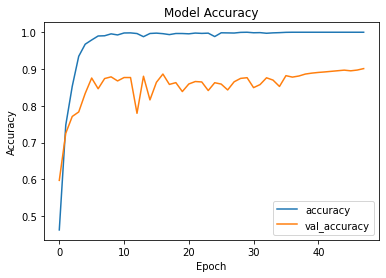

In [ ]:
# model evaluation
import matplotlib.pyplot as plt

# plot of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show()

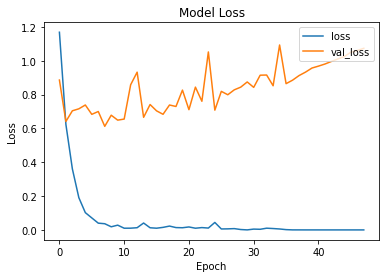

In [ ]:
# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

## **Kriteria Penilaian**

Berikut kriteria submission yang harus Anda penuhi:

- Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel. **(done)**
- Harus menggunakan LSTM dalam arsitektur model. **(done)**
- Harus menggunakan model sequential. **(done)**
- Validation set sebesar 20% dari total dataset. **(done)**
- Harus menggunakan Embedding. **(done)**
- Harus menggunakan fungsi tokenizer. **(done)**
- Akurasi dari model minimal 75% pada train set dan validation set. **(done)**

Anda dapat menerapkan beberapa saran untuk mendapatkan nilai tinggi, berikut sarannya:

- Akurasi dari model di atas 80%. **(done)**

- Mengimplementasikan callback. **(done)**

- Membuat plot loss dan akurasi pada saat training dan validation. **(done)** <br>


Detail penilaian submission:

- Bintang 1 : Semua ketentuan terpenuhi, namun terdapat indikasi plagiat yaitu dengan menggunakan proyek orang lain dan hanya mengubah kontennya saja.

- Bintang 2 : Semua ketentuan terpenuhi, namun penulisan kode berantakan.

- Bintang 3 : Semua ketentuan terpenuhi namun hanya mengikuti seperti apa yang ada pada modul.

- Bintang 4 : Semua ketentuan terpenuhi, dataset memiliki minimal 2000 sampel data dan akurasi pada training set dan validation set di atas 85%.

- Bintang 5 : Semua ketentuan terpenuhi, dataset memiliki 3 kelas atau lebih dan minimal 2000 sampel data. Serta akurasi pada training set dan validation set di atas 90%. **(done)**

## **Ketentuan Berkas Submission**

Beberapa poin yang perlu diperhatikan ketika mengirimkan berkas submission:

- Menggunakan bahasa pemrograman Python. **(done)**

- Mengirimkan pekerjaan Anda dalam bentuk berkas ipynb dan py dalam 1 folder yang telah di zip. **(done)**

- File ipynb yang dikirim telah dijalankan terlebih dahulu sehingga output telah ada tanpa reviewer perlu menjalankan ulang notebook. **(done)**